# Pandas Practice 2

![IRIS, https://github.com/simonava5/fishers-iris-data](./images/iris.png)

After the notebook with a lot of new input, let's start applying it totally by yourselves. 
For this purpose we will use one of the most standard real-life datasets: Its called Iris Dataset, and is all about the plant iris. Let's learn a little bit more about the dataset by looking at it. 

## Learning Objectives





By the end of this notebook, you will feel more comfortable with your newly acquired knowledge, as you will see that you can

- load data from csv files into DataFrames
- access data stored in DataFrames
- use the general functions of a DataFrame to answer questions about the data
- create insightful plots using the pandas function `.plot()`
- explain what conclusions you draw from these visualizations.


In [2]:
# import pandas
import pandas as pd

In [3]:
# load the data
df = pd.read_csv('data/iris.csv')

Let us first have a look at the head of the table, maybe also on the last 10 rows...

In [4]:
df.head(9)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa


How many irises are in the data set?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


How many different species are there?

In [15]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We have 3 different species!

Calculate the mean, median, mode for petal length

In [ ]:
df['petal_length'].mean()

np.float64(3.758666666666666)

In [33]:
df.groupby('species').mean()['petal_length']  

species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_length, dtype: float64

What can you conclude about the distribution for petal length?

In [53]:
df['petal_length'].median()

np.float64(4.35)

In [54]:
df['petal_length'].mode()

0    1.5
Name: petal_length, dtype: float64

<Axes: >

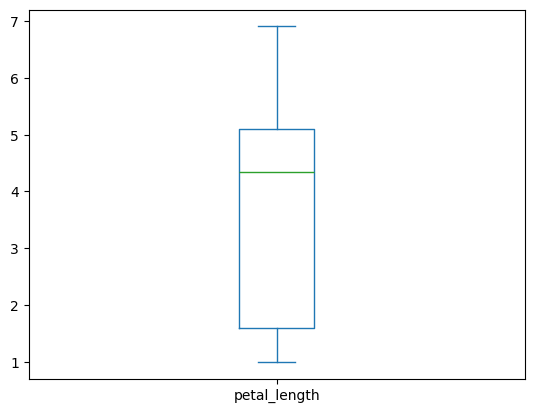

In [36]:
df[['petal_length']].plot(kind='box')

Looking at the data, it can be inferred that the distribution of petal lengths within the dataset is approximately symmetric with few outliers.
This indicates that the majority of Iris flowers in this dataset have average or near-average petal lengths. The box plot may also reveal specific characteristics about the range and variability of these petal lengths, such as skewness or presence of extreme values (outliers).

This analysis can provide valuable insights for further data analysis or machine learning models, possibly predicting Iris flower species based on their petal length.

What is the smallest and largest value for petal length?

In [49]:
max = df['petal_length'].nlargest(1)
min = df['petal_length'].nsmallest(1)
print('max = ', max)
print('min = ', min)
print(f'Max petal length: {max.values[0]}')
print(f'Min petal length: {min.values[0]}')

max =  118    6.9
Name: petal_length, dtype: float64
min =  22    1.0
Name: petal_length, dtype: float64
Max petal length: 6.9
Min petal length: 1.0


Calculate the variance and standard deviation for petal length

In [50]:
df['petal_length'].var()

np.float64(3.113179418344519)

In [51]:
df['petal_length'].std()

np.float64(1.7644204199522626)

Calculate the basic descriptive statistics for all columns of the iris data set with a single command.

In [56]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


What is the overall average for sepal length?

In [60]:
df['sepal_length'].mean()

np.float64(5.843333333333334)

Use the DataFrame grouping function to determine the count by species.

In [58]:
df.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


Use the DataFrame grouping function to determine the average length and width of sepals and pedals by species.

In [65]:
average_stats = df.groupby('species').mean()
print(average_stats[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


Add the sum of the sepal width and length as a new column to your DataFrame.

In [68]:
df['sum_of_sepal_width_and_length'] = df['sepal_length'] + df['sepal_width']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sepal_length                   150 non-null    float64
 1   sepal_width                    150 non-null    float64
 2   petal_length                   150 non-null    float64
 3   petal_width                    150 non-null    float64
 4   species                        150 non-null    object 
 5   sum_of_sepal_width_and_length  150 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


Visualize petal length with a histogram

<Axes: ylabel='Frequency'>

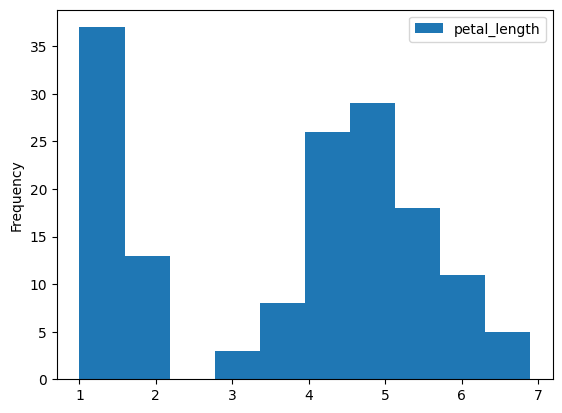

In [69]:
df[['petal_length']].plot(kind='hist')

Describe the distribution

It appears that the histograms are split into two different ranges on the x-axis. For x values from 1 to 2, there seems to be a higher frequency or count of observations (I believe these might correspond to specific quality scores). However, for x values ranging from 3 to 7, there is only one observation in this range. This disparity could indicate potential issues with data collection or input.

Which is more informative: the summary statistics or visualizations?

Neither the summary statistics nor visualization alone, but both together will provide the best information.

Visualize petal length and width with a "scatter_matrix"

<Axes: xlabel='petal_length', ylabel='petal_width'>

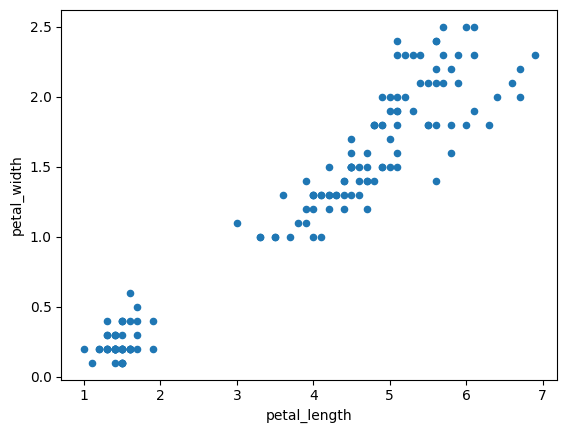

In [79]:
df.plot(kind='scatter', x='petal_length', y='petal_width')

Create a new column with a rough estimate of petal area by multiplying petal length and width together.

In [80]:
df['petal_area'] = df['petal_length'] * df['petal_width']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sepal_length                   150 non-null    float64
 1   sepal_width                    150 non-null    float64
 2   petal_length                   150 non-null    float64
 3   petal_width                    150 non-null    float64
 4   species                        150 non-null    object 
 5   sum_of_sepal_width_and_length  150 non-null    float64
 6   petal_area                     150 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


Create a new DataFrame with petal areas greater than $1cm^2$.

In [82]:
# Create new DataFrame with rows where petal area is greater than 1 cm²
new_df = df[df['petal_area'] > 1]
new_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sum_of_sepal_width_and_length,petal_area
50,7.0,3.2,4.7,1.4,Iris-versicolor,10.2,6.58
51,6.4,3.2,4.5,1.5,Iris-versicolor,9.6,6.75
52,6.9,3.1,4.9,1.5,Iris-versicolor,10.0,7.35
53,5.5,2.3,4.0,1.3,Iris-versicolor,7.8,5.20
54,6.5,2.8,4.6,1.5,Iris-versicolor,9.3,6.90


Create 3 new DataFrames, one for each species. Use the entire dataset.

In [94]:
# Group by species and store each group in a new DataFrame 
df_setosa = df[df['species'] == 'Iris-setosa']
df_virginica = df[df['species'] == 'Iris-virginica']
df_versicolor = df[df['species'] == 'Iris-versicolor']

In [87]:
df_setosa.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species,sum_of_sepal_width_and_length,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,8.6,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,7.9,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,7.9,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,7.7,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,8.6,0.28
5,5.4,3.9,1.7,0.4,Iris-setosa,9.3,0.68
6,4.6,3.4,1.4,0.3,Iris-setosa,8.0,0.42
7,5.0,3.4,1.5,0.2,Iris-setosa,8.4,0.30
8,4.4,2.9,1.4,0.2,Iris-setosa,7.3,0.28
9,4.9,3.1,1.5,0.1,Iris-setosa,8.0,0.15


In [91]:
df_virginica.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species,sum_of_sepal_width_and_length,petal_area
100,6.3,3.3,6.0,2.5,Iris-virginica,9.6,15.00
101,5.8,2.7,5.1,1.9,Iris-virginica,8.5,9.69
102,7.1,3.0,5.9,2.1,Iris-virginica,10.1,12.39
103,6.3,2.9,5.6,1.8,Iris-virginica,9.2,10.08
104,6.5,3.0,5.8,2.2,Iris-virginica,9.5,12.76
105,7.6,3.0,6.6,2.1,Iris-virginica,10.6,13.86
106,4.9,2.5,4.5,1.7,Iris-virginica,7.4,7.65
107,7.3,2.9,6.3,1.8,Iris-virginica,10.2,11.34
108,6.7,2.5,5.8,1.8,Iris-virginica,9.2,10.44
109,7.2,3.6,6.1,2.5,Iris-virginica,10.8,15.25


In [95]:
df_versicolor.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species,sum_of_sepal_width_and_length,petal_area
50,7.0,3.2,4.7,1.4,Iris-versicolor,10.2,6.58
51,6.4,3.2,4.5,1.5,Iris-versicolor,9.6,6.75
52,6.9,3.1,4.9,1.5,Iris-versicolor,10.0,7.35
53,5.5,2.3,4.0,1.3,Iris-versicolor,7.8,5.20
54,6.5,2.8,4.6,1.5,Iris-versicolor,9.3,6.90
55,5.7,2.8,4.5,1.3,Iris-versicolor,8.5,5.85
56,6.3,3.3,4.7,1.6,Iris-versicolor,9.6,7.52
57,4.9,2.4,3.3,1.0,Iris-versicolor,7.3,3.30
58,6.6,2.9,4.6,1.3,Iris-versicolor,9.5,5.98
59,5.2,2.7,3.9,1.4,Iris-versicolor,7.9,5.46
